Step 1
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 2
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 3
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 4
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 5
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 6
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 7
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 8
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 9
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 10
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 11
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 12
actions: [tensor([[1]], device='cuda:0'), tensor([[1]], device='cuda:0')]
Step 13
actions: [tensor(

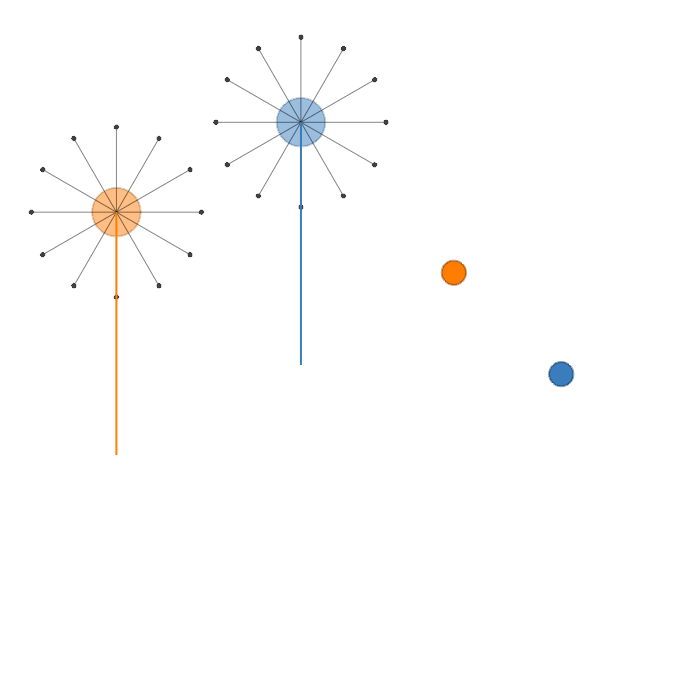

In [12]:
# import pyvirtualdisplay
# display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
# display.start()

from vmas.simulator.scenario import BaseScenario
from typing import Union
import time
import torch
from vmas import make_env
from vmas.simulator.core import Agent

def _get_deterministic_action(agent: Agent, continuous: bool, env):
    if continuous:
        action = -agent.action.u_range_tensor.expand(env.batch_dim, agent.action_size)
    else:
        action = (
            torch.tensor([1], device=env.device, dtype=torch.long)
            .unsqueeze(-1)
            .expand(env.batch_dim, 1)
        )
    return action.clone()

def use_vmas_env(
    render: bool,
    num_envs: int,
    n_steps: int,
    device: str,
    scenario: Union[str, BaseScenario],
    continuous_actions: bool,
    random_action: bool,
    **kwargs
):
    """Example function to use a vmas environment.
    
    This is a simplification of the function in `vmas.examples.use_vmas_env.py`.

    Args:
        continuous_actions (bool): Whether the agents have continuous or discrete actions
        scenario (str): Name of scenario
        device (str): Torch device to use
        render (bool): Whether to render the scenario
        num_envs (int): Number of vectorized environments
        n_steps (int): Number of steps before returning done
        random_action (bool): Use random actions or have all agents perform the down action

    """

    scenario_name = scenario if isinstance(scenario,str) else scenario.__class__.__name__

    env = make_env(
        scenario=scenario,
        num_envs=num_envs,
        device=device,
        continuous_actions=continuous_actions,
        seed=0,
        # Environment specific variables
        **kwargs
    )

    frame_list = []  # For creating a gif
    init_time = time.time()
    step = 0

    for s in range(n_steps):
        step += 1
        print(f"Step {step}")

        actions = []
        for i, agent in enumerate(env.agents):
            if not random_action:
                action = _get_deterministic_action(agent, continuous_actions, env)
            else:
                action = env.get_random_action(agent)

            actions.append(action)
        print(f"actions: {actions}")
        obs, rews, dones, info = env.step(actions)

        if render:
            frame = env.render(
                mode="rgb_array",
                agent_index_focus=None,  # Can give the camera an agent index to focus on
            )
            frame_list.append(frame)

    total_time = time.time() - init_time
    print(
        f"It took: {total_time}s for {n_steps} steps of {num_envs} parallel environments on device {device} "
        f"for {scenario_name} scenario."
    )

    if render:
        from moviepy.editor import ImageSequenceClip
        fps=30
        clip = ImageSequenceClip(frame_list, fps=fps)
        clip.write_gif(f'{scenario_name}.gif', fps=fps)



scenario_name="simple_reference"

use_vmas_env(
    scenario=scenario_name,
    render=True,
    num_envs=1,
    n_steps=100,
    device="cuda",
    continuous_actions=True,
    random_action=False,
    # Environment specific variables
    n_agents=2,
)
    
from IPython.display import Image
Image(f'{scenario_name}.gif')